# MAST Plasma Current

Infer plasma current from CCFE's Mega Ampere Spherical Tokamak using discrete magnetic diagnostic data.

> **Note:** The dataset files for this challenge should be available in the `fair_mast_data/plasma_current` directory.

## Overview
This notebook addresses the first of three Data Science challenges for the ITER International School 2024.

**Challenge Goal:** Reconstruct plasma current time-series waveforms from the Mega Ampere Spherical Tokamak (MAST) using magnetic field measurements.

The open-source MAST Data Catalog provides all data for this challenge. Credit to Samuel Jackson, Nathan Cummings, Saiful Khan, and the MAST community for creating this FAIR dataset.

## Description
Tokamaks measure plasma current with high precision. In this challenge, you must reconstruct plasma current waveforms by applying machine learning to magnetic diagnostic signals.

We've removed information about the location, orientation, and calibration of diagnostic measurements to prevent using traditional inference techniques.

This challenge presents a labeled regression problem. Your model must transform one-dimensional signals into accurate target waveforms.

The image below shows signals and targets from the first shot in the training dataset: 

![MAST Plasma Signals and Targets](../media/images/plasma_current.png)

## Dataset Information

The `./fair_mast_data/plasma_current` directory contains data files for the MAST Plasma Current challenge.

### Available Files
Both train and test files use a simple CSV format with a single header.

- `train.csv` - Training dataset
- `test.csv` - Test dataset

### Data Structure
- `index` - Unique identifier for each sample
- `time` - Measurement time in seconds
- `XMA_CCBV04:XMA_CCBV36` - Magnetic measurements from the center_column group in volts
- `XMA_OBR03:XMA_OBR17.1` - Magnetic measurements from the outer_discrete group in volts
- `plasma_current` - Target plasma current in kiloamperes (kA)

## Example

The code below demonstrates how to prepare a competition submission. This basic approach provides a starting point that you'll need to improve to achieve competitive scores.

First, we'll import the necessary libraries for data processing, visualization, and machine learning. Python libraries are organized at the top in three groups: standard library, third-party packages, and local modules.

In [1]:
# Standard library imports
import pathlib

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline

### Data Loading
First, we locate the data files. The `train.csv` and `test.csv` files are stored in the `fair_mast_data/plasma_current` directory. We use the `pathlib` library to find these files.

In [2]:
# Set the path to the fair_mast_data directory
path = pathlib.Path().absolute().parent / "fair_mast_data/plasma_current"
print(list(path.glob('*.csv')))


[PosixPath('/home/ITER/brussel/Documents/data-science-challenges/fair_mast_data/plasma_current/linear_regression.csv'), PosixPath('/home/ITER/brussel/Documents/data-science-challenges/fair_mast_data/plasma_current/train.csv'), PosixPath('/home/ITER/brussel/Documents/data-science-challenges/fair_mast_data/plasma_current/test.csv')]


In [3]:
# Load the data into train and test DataFrames
train = pd.read_csv(path / "train.csv")
test = pd.read_csv(path / "test.csv")

# Print the first few rows of the train DataFrame
print(train.head())


   index     time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
0      0 -0.06560   -0.126953   -0.024414   -0.014648   -0.029297   -0.268555   
1      1 -0.06535   -0.129395   -0.024414   -0.017090   -0.031738   -0.273438   
2      2 -0.06510   -0.129395   -0.024414   -0.017090   -0.034180   -0.275879   
3      3 -0.06485   -0.131836   -0.024414   -0.017090   -0.031738   -0.278320   
4      4 -0.06460   -0.131836   -0.024414   -0.017090   -0.029297   -0.278320   

   XMA_OBR03  XMA_OBR03.1  XMA_OBR06  XMA_OBR06.1  XMA_OBR14  XMA_OBR14.1  \
0  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
1  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
2  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
3  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
4  -0.002441    -0.002441  -0.029297    -0.029297  -0.019531    -0.019531   

   XMA_OBR17  XMA_OBR17.1  shot_index  plasma_curr

### Model Pipeline
Create a scikit-learn pipeline to process training and test data consistently. This example uses a minimal pipeline setup.

In [4]:
pipe = sklearn.pipeline.make_pipeline(
    sklearn.linear_model.LinearRegression(),
)

### Data Preparation
We divide the training data into features (X) and target (y), then split into training and validation sets. This example uses all signal columns as features. A thorough understanding of your data before this step significantly improves results.

In [5]:
X, y = train.drop("plasma_current", axis=1), train.plasma_current
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    random_state=3,
)

X.head(2)

,index,time,XMA_CCBV04,XMA_CCBV12,XMA_CCBV20,XMA_CCBV28,XMA_CCBV36,XMA_OBR03,XMA_OBR03.1,XMA_OBR06,XMA_OBR06.1,XMA_OBR14,XMA_OBR14.1,XMA_OBR17,XMA_OBR17.1,shot_index
0,0,-0.06560,-0.126953,-0.024414,-0.014648,-0.029297,-0.268555,-0.002441,-0.002441,-0.031738,-0.031738,-0.019531,-0.019531,-0.021973,-0.021973,0
1,1,-0.06535,-0.129395,-0.024414,-0.017090,-0.031738,-0.273438,-0.002441,-0.002441,-0.031738,-0.031738,-0.019531,-0.019531,-0.024414,-0.024414,0


### Model Training and Evaluation

First, we fit the model to the training set and generate predictions for the validation set.

In [6]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

#### Understanding Model Evaluation Metrics

We evaluate model performance using multiple metrics. While the challenge uses only Mean Absolute Percentage Error (MAPE) for scoring, additional metrics provide valuable insights during development.

**Mean Absolute Percentage Error (MAPE)**

MAPE measures the average percentage difference between predicted and actual values. Mathematically, it's calculated as:

$MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|$

Where:
- $y_i$ represents the true plasma current value
- $\hat{y}_i$ represents the predicted plasma current value
- $n$ is the number of predictions being evaluated

**Why use MAPE for this challenge?**
- **Scale-independence**: MAPE expresses error as a percentage, making it useful for comparing performance across different datasets or plasma current magnitudes
- **Interpretability**: The percentage format is intuitive for understanding prediction accuracy
- **Competition metric**: This is the primary scoring metric for the challenge

**Mean Absolute Error (MAE)**

MAE measures the average magnitude of errors between predicted and actual values, without considering their direction. 

$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

**Benefits of MAE:**
- **Same units**: Expressed in kiloamperes (kA), making it directly interpretable in the physical context
- **Robustness**: Less sensitive to outliers than squared error metrics
- **Direct interpretation**: Tells us the average absolute deviation in kA between predictions and actual values

In [7]:
# Calculate Mean Absolute Percentage Error (MAPE)
# Lower values indicate better model performance (0% is perfect)
mape = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE {mape:1.3f} (lower is better)")

# Calculate Mean Absolute Error (MAE) in kiloamperes
# This is more intuitive as it's in the same units as plasma current
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE {mae:1.3f} kA (lower is better)")

MAPE 5.023 (lower is better)
MAE 9.959 kA (lower is better)


### Making Predictions and Generating Submissions

After validating our model performance, we can generate predictions for the test dataset and prepare a submission file. The Plasma Current challenge requires a CSV file with "index" and "plasma_current" headers followed by predictions.

In [8]:
# Make predictions for the test dataset
predictions = pipe.predict(test)

# Create and save submission file
submission = pd.DataFrame(predictions, columns=["plasma_current"])
submission.index.name = "index"
submission.to_csv(path / "linear_regression.csv")

### Results Visualization

Visualizing predictions against validation data helps evaluate performance. Since the competition includes multiple plasma pulses, displaying individual waveforms improves interpretation. We first reorder the dataset that was shuffled during splitting.

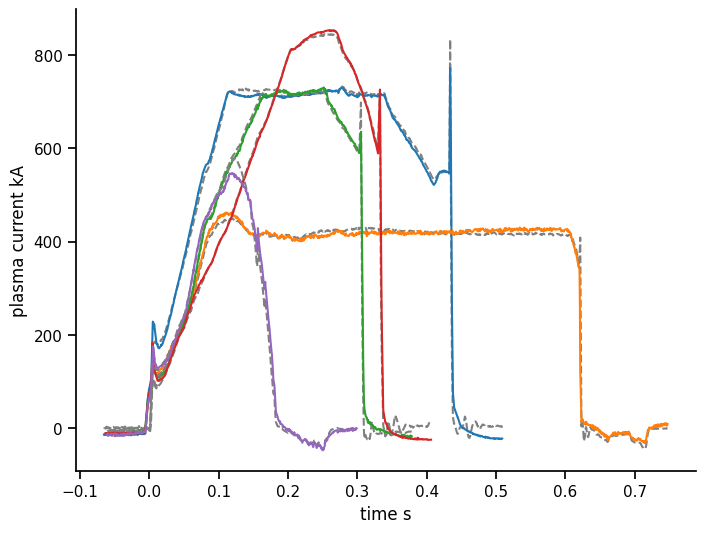

In [9]:
sns.set_context("notebook")
axes = plt.subplots(figsize=(8, 6))[1]

sort_index = np.argsort(X_test.time)
_X_test = X_test.iloc[sort_index]
_y_test = y_test.iloc[sort_index]
for shot_index in np.unique(X_train.shot_index):
    index = _X_test.shot_index == shot_index
    axes.plot(_X_test.loc[index, "time"], _y_test.loc[index], "--", color="gray")
    axes.plot(_X_test.loc[index, "time"], pipe.predict(_X_test)[index])
axes.set_xlabel("time s")
axes.set_ylabel("plasma current kA")
sns.despine()

### Model Assessment and Next Steps

The plot compares actual plasma current (gray dashed lines) with model predictions (colored lines). When evaluating your model, consider these key questions:

1. Do the predictions match your expectations?
2. How accurately does the model fit the data?
3. Is there data leakage between training and validation sets?
4. What methods could fix potential leakage issues?

For improving model performance, consider:
- Using more sophisticated models beyond linear regression
- Implementing feature engineering to enhance signal data
- Applying appropriate preprocessing techniques
- Tuning model hyperparameters

Your final ranking depends on your score on the private leaderboard section, which uses a hidden evaluation dataset.

__Aswers to questions__ _Louis Brusset 20/05/2025_

1.
The predictions are matching the datas well. The tendance is replicated. However, for some pulse there are differencies between the true and predicted values. Expecially, an imaginated surcharge at the begining, a missing surcharge at the end or missing oscillations after the end of the pulse.
In addition, one observe that the prediction matchs better the long-time tendance and less the short-time changes (oscillations, discharges). It's maybe due to the linear effect of the model.

2.
The MAPE and the MAE are both pretty low.
MAPE: 5.023 % (less than 10% is an good results)
MAE: 9.959 kA (10kA over a maximum of 800kA is a good result too)

3.
The splitting between train, validation (and test) set is well-done. In reality, the test set in not use after, and the validation test (called 'test set') is used as a test set.
But, by shuffeling all the data during splitting, data of a same shot aren't connected anymore. Thus, we might want to use all the data of the same pulse together.

4.
To improve the prediction, we could do:
* change the model for a non-linear one ;
* preprocess the data (normalizing...) ;
* tune learning rate by ensemble methodes ;
* try to differently assemble the train data (to keep coherance; for instance: one pulse = one batch or one sample).

Thus, we will firsly implement a feedforward neural network aiming to find non-linear behavior again.
Then, we will try to implement a recurrent neural network to take into auccount the past value in the same pulse.

In [10]:
### Louis Brusset 20/05/2025

# Find the path to the fair_mast_data directory
path = pathlib.Path().absolute().parent / "fair_mast_data/plasma_current"
print(list(path.glob('*.csv')))

# Load the data
train = pd.read_csv(path / "train.csv")
test = pd.read_csv(path / "test.csv")

print(train.head(2))

[PosixPath('/home/ITER/brussel/Documents/data-science-challenges/fair_mast_data/plasma_current/linear_regression.csv'), PosixPath('/home/ITER/brussel/Documents/data-science-challenges/fair_mast_data/plasma_current/train.csv'), PosixPath('/home/ITER/brussel/Documents/data-science-challenges/fair_mast_data/plasma_current/test.csv')]
   index     time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
0      0 -0.06560   -0.126953   -0.024414   -0.014648   -0.029297   -0.268555   
1      1 -0.06535   -0.129395   -0.024414   -0.017090   -0.031738   -0.273438   

   XMA_OBR03  XMA_OBR03.1  XMA_OBR06  XMA_OBR06.1  XMA_OBR14  XMA_OBR14.1  \
0  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
1  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   

   XMA_OBR17  XMA_OBR17.1  shot_index  plasma_current  
0  -0.021973    -0.021973           0       -0.673544  
1  -0.024414    -0.024414           0       -0.063172  


## Data Visualization

We are going to visualy explore the dataset to see how the features are and how they interact with other. We focus on the train dataset.
The analysises will be on :
* Descriptive statistics
* Covariance matrix
* Time analysis for a given shot
* Correlation with plasma current
* 

__Louis Brusset__ _20/05/2025_

Descriptive statistics :
                 mean       std
XMA_CCBV04   0.221067  0.369407
XMA_CCBV12   0.173684  0.253565
XMA_CCBV20   0.358865  0.336098
XMA_CCBV28   0.275226  0.281790
XMA_CCBV36   0.458828  0.733195
XMA_OBR03    0.300698  0.237521
XMA_OBR03.1  0.300698  0.237521
XMA_OBR06    0.426040  0.297521
XMA_OBR06.1  0.426040  0.297521
XMA_OBR14   -0.209575  0.127620
XMA_OBR14.1 -0.209575  0.127620


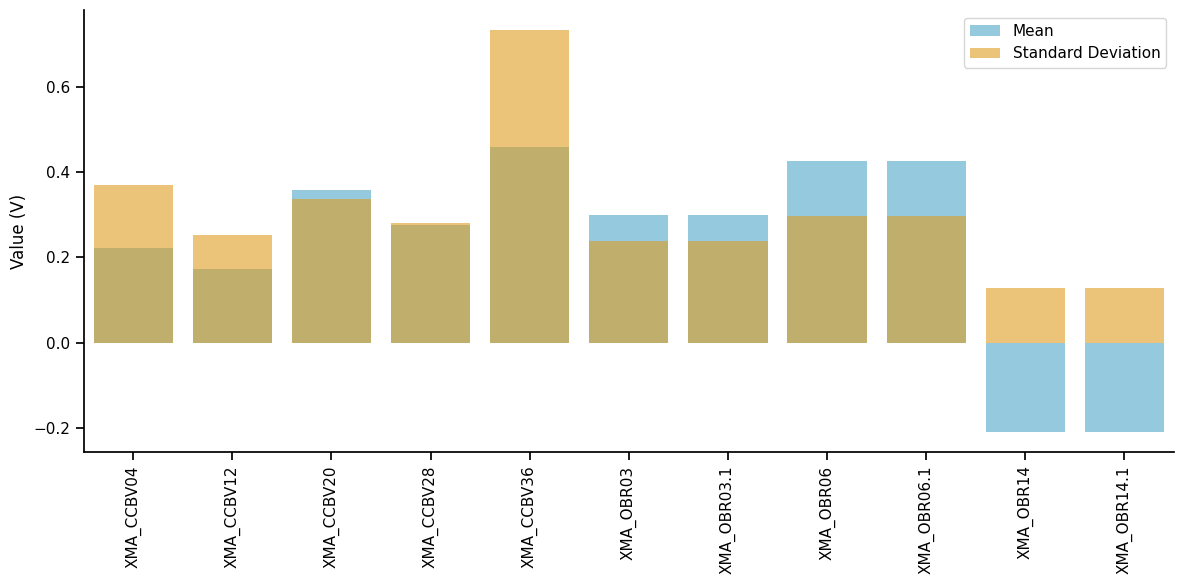

In [11]:
### Louis Brusset 20/05/2025

# remove the first two columns amd making the last one
train_without_index = train.iloc[:, 2:]
train_without_plasma_current = train_without_index.iloc[:, :-2]

# Descriptive statistics
desc_stats = train_without_plasma_current.describe().T[['mean', 'std']] [:-2]
print("Descriptive statistics :")
print(desc_stats)

plt.figure(figsize=(12, 6))

sns.barplot(x=desc_stats.index, y=desc_stats["mean"], color="skyblue", label="Mean")
sns.barplot(x=desc_stats.index, y=desc_stats["std"], color="orange", alpha=0.6, label="Standard Deviation")
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Value (V)")
plt.legend()
plt.tight_layout()
sns.despine()
plt.show()


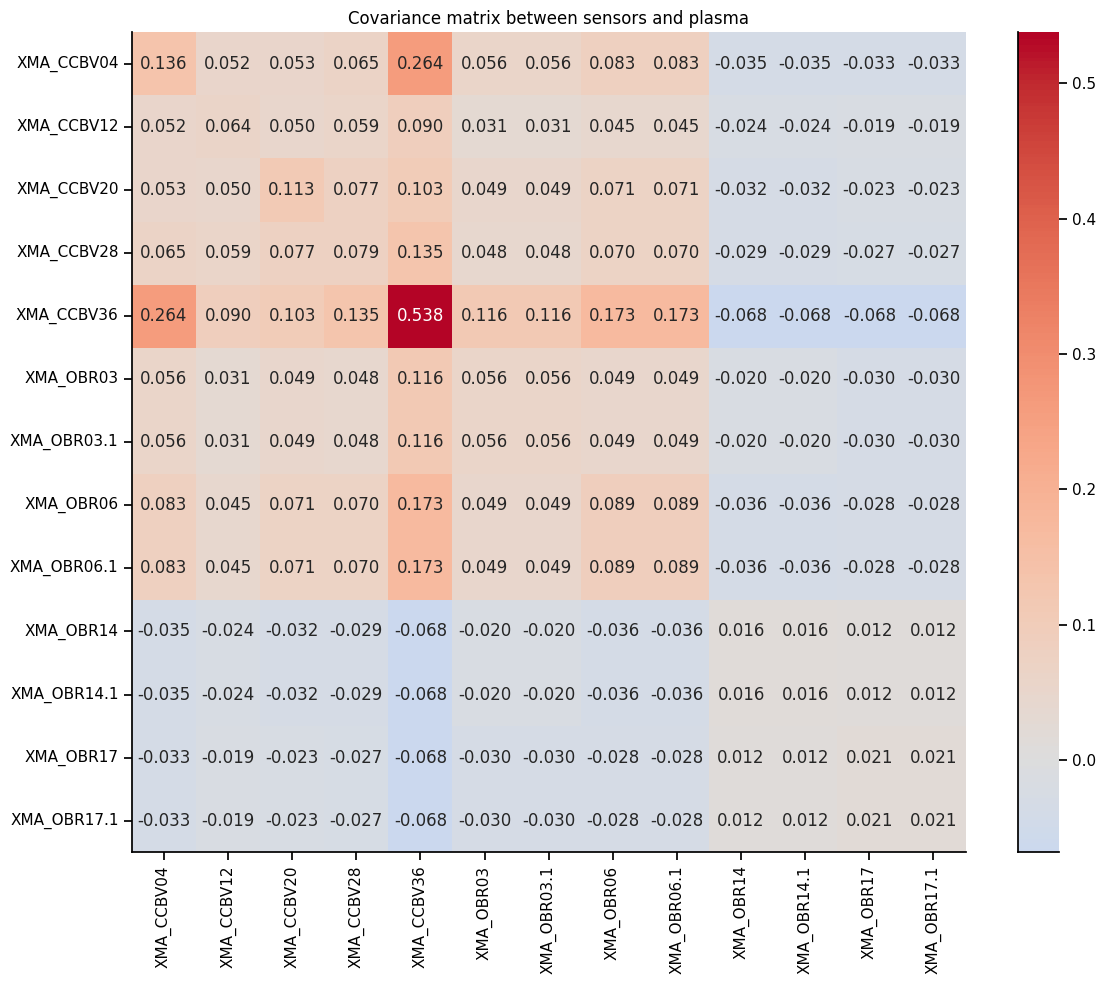

In [12]:
# Covariance matrix

plt.figure(figsize=(12, 10))
cov_matrix = train_without_plasma_current.cov()
sns.heatmap(cov_matrix, annot=True, fmt=".3f", cmap="coolwarm", center=0)
plt.title("Covariance matrix between sensors and plasma")
plt.tight_layout()
sns.despine()
plt.show()


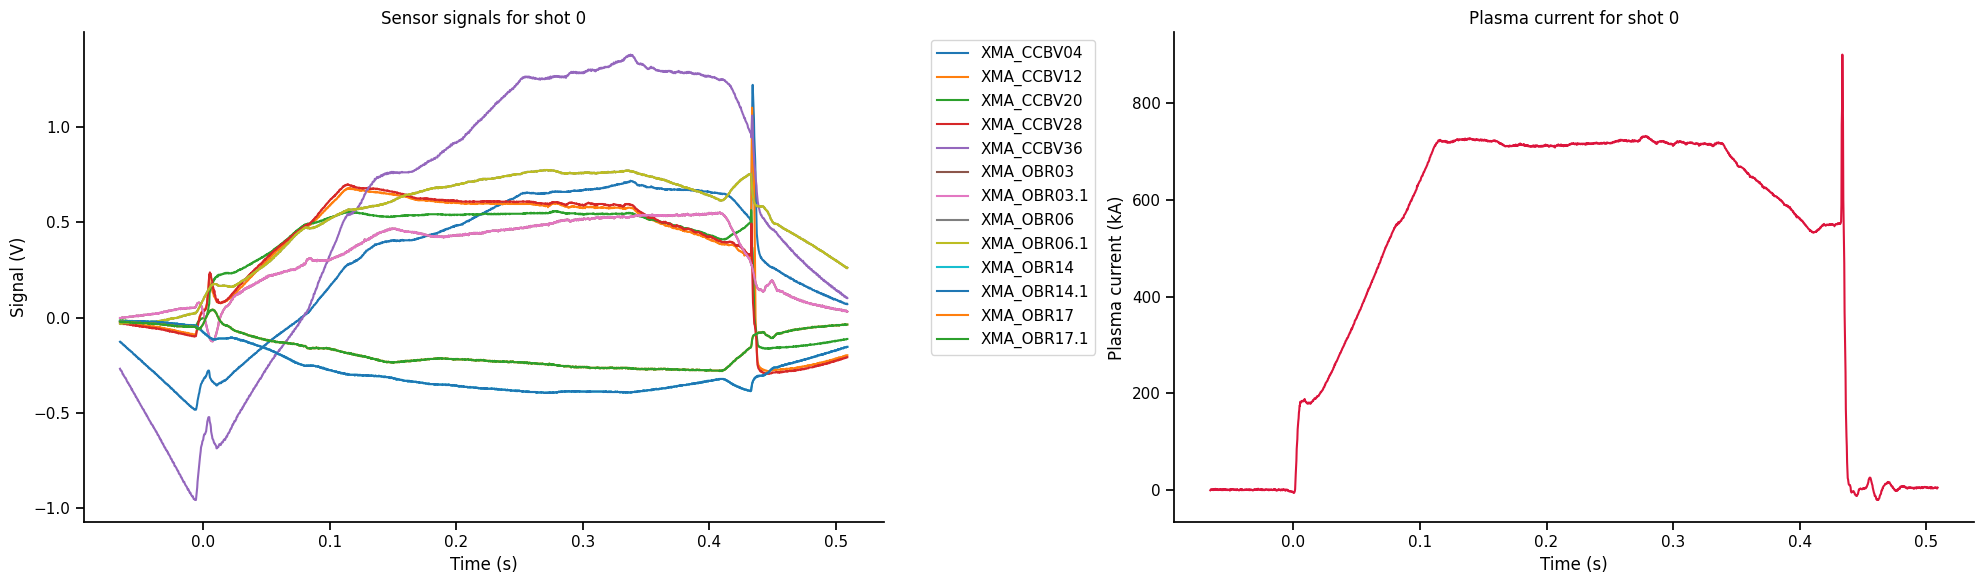

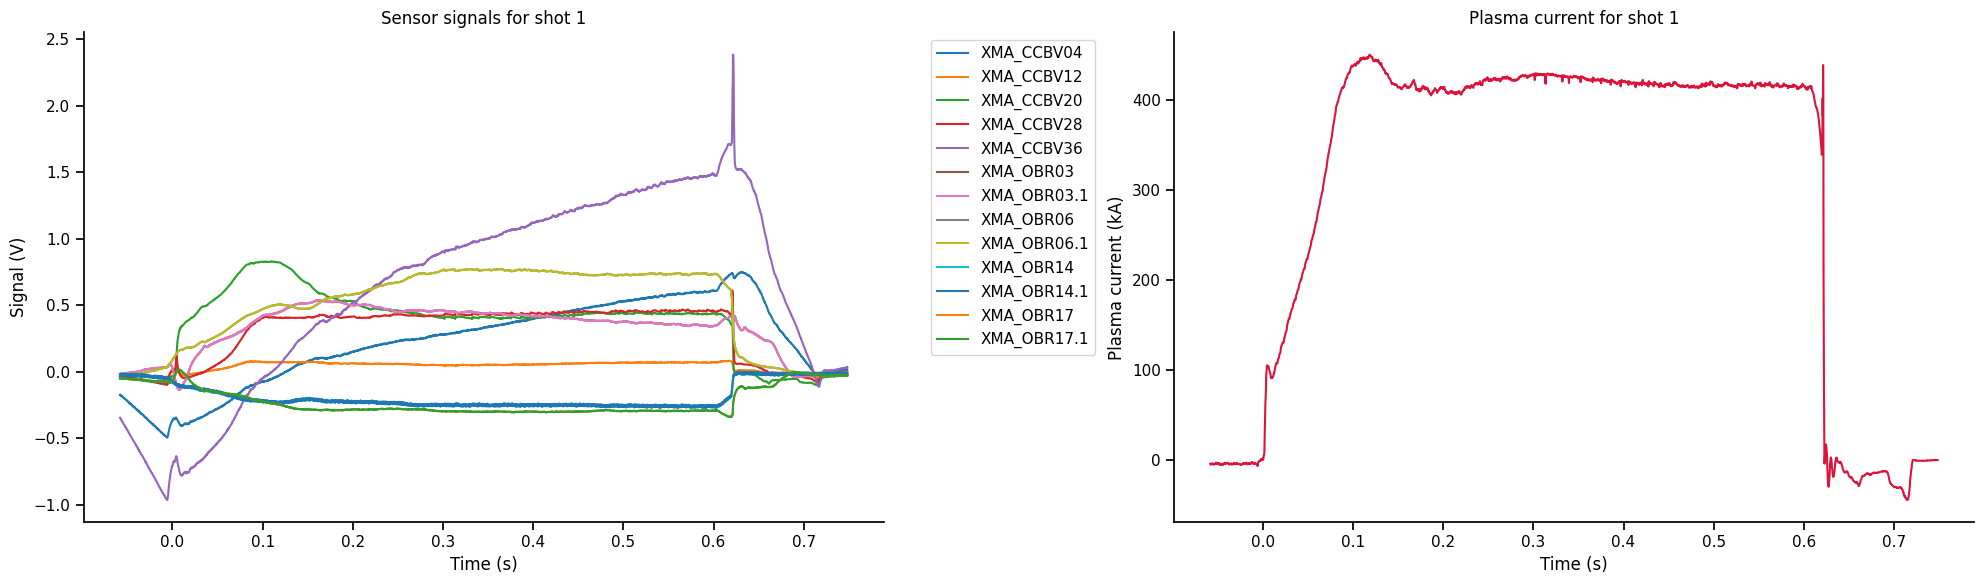

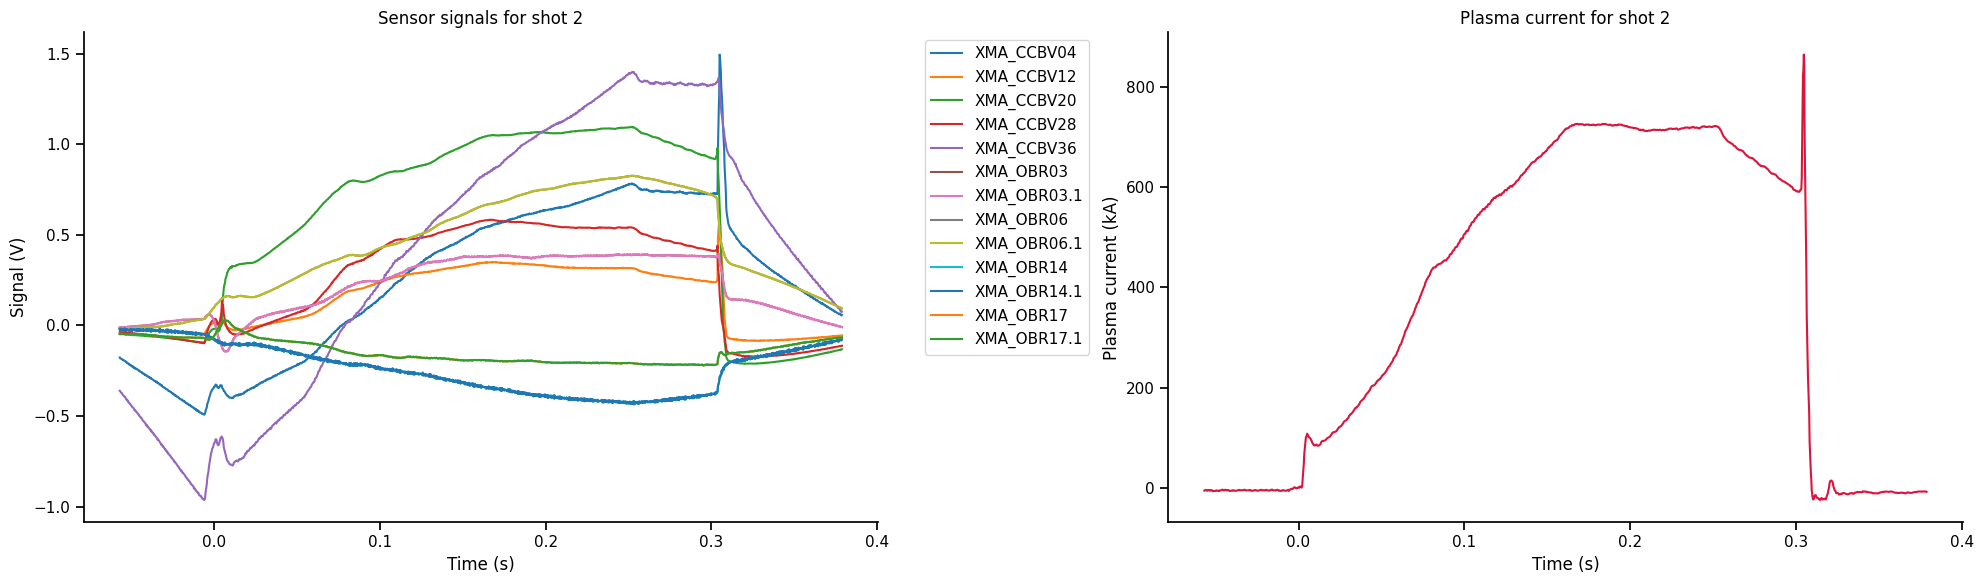

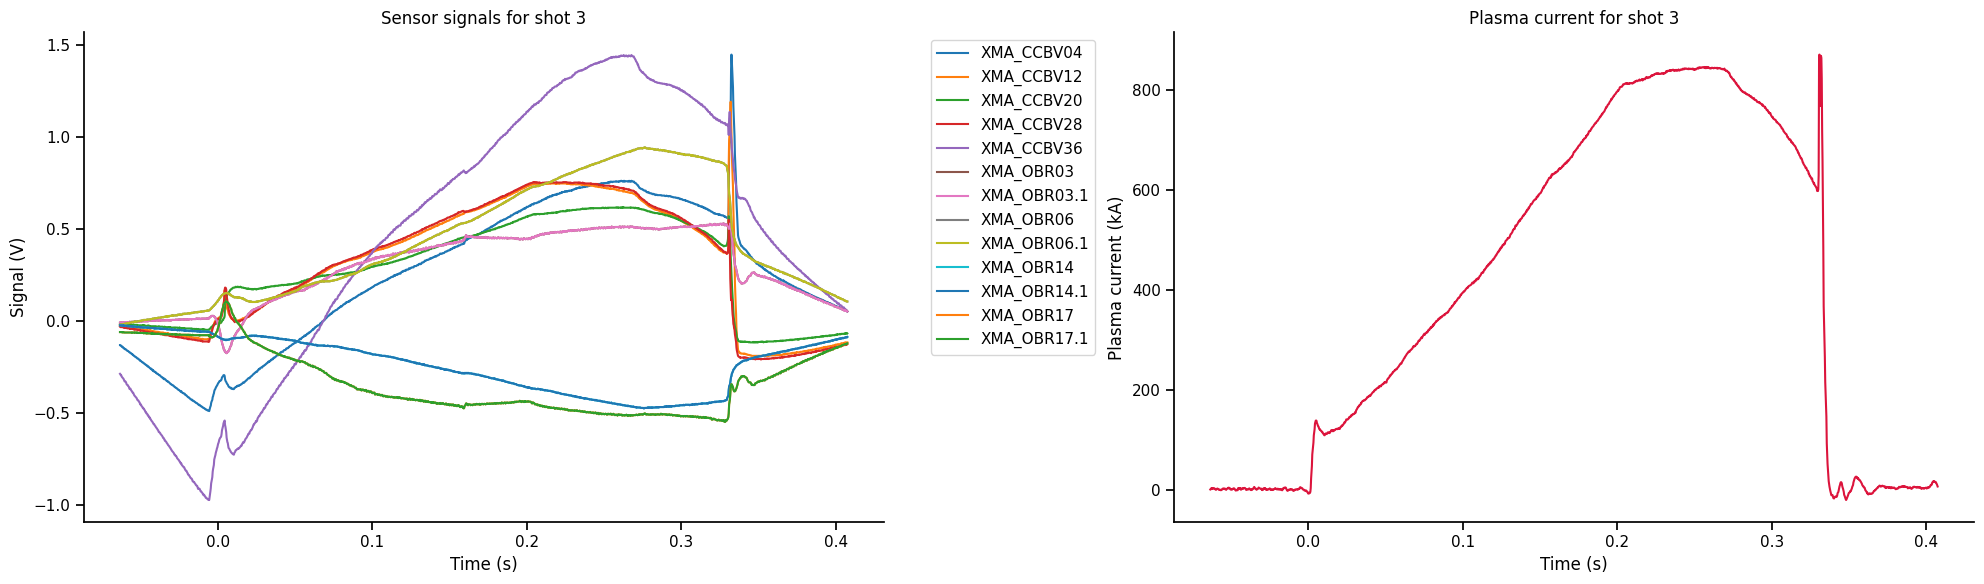

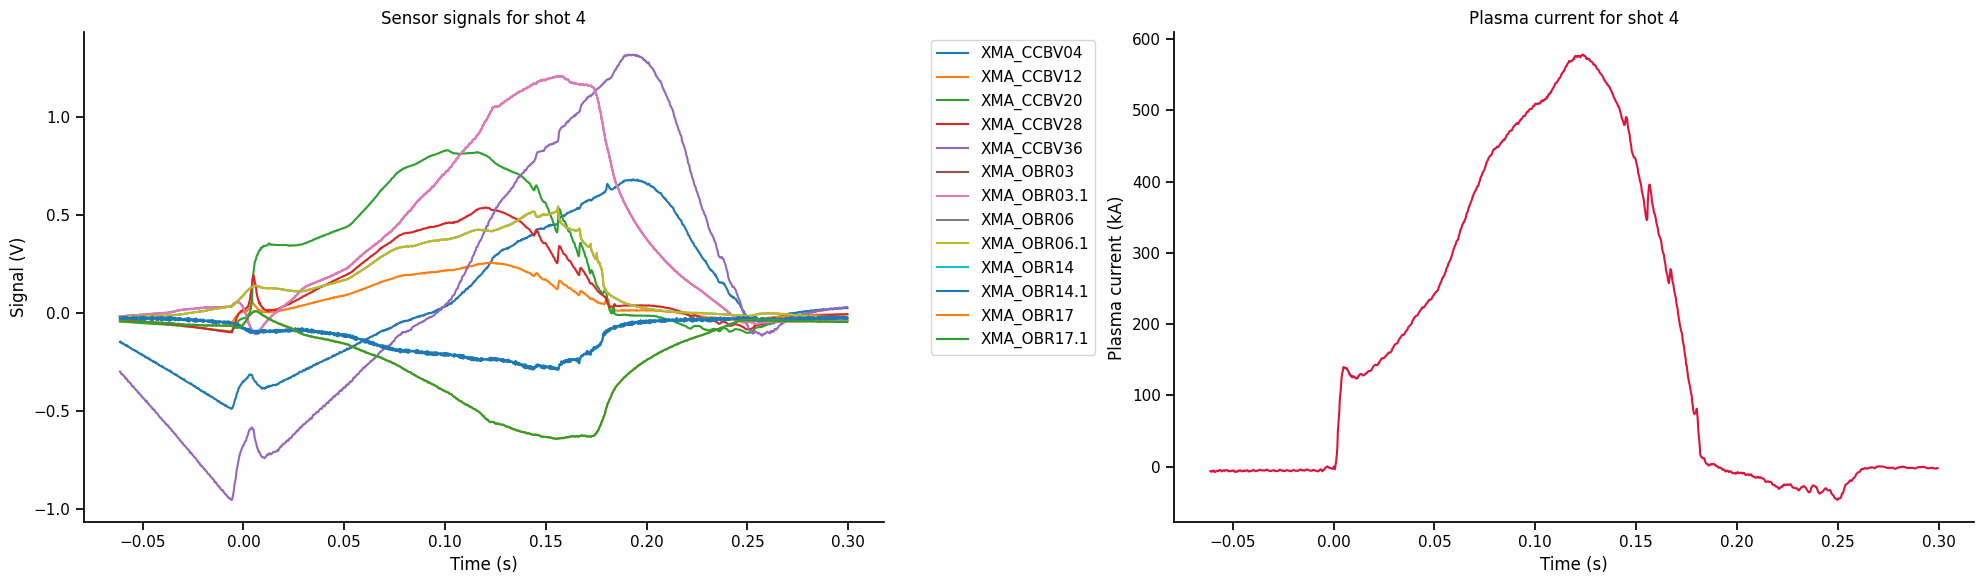

In [13]:
# Time analysis for a given shot

def visualize_shot(shot_id):
    """
    Visualize the evolution of the sensors and the plasma current over time for a given shot.
    """
    df_shot = train[train["shot_index"] == shot_id].sort_values("time")

    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

    for col in train.columns:
        if col.startswith("XMA_"):
            sns.lineplot(data=df_shot, x="time", y=col, ax=ax1, label=col)
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Signal (V)")
    ax1.set_title(f"Sensor signals for shot {shot_id}")
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.despine()

    sns.lineplot(data=df_shot, x="time", y="plasma_current", ax=ax2, color="crimson")
    ax2.set_xlabel("Time (s)")
    ax2.set_ylabel("Plasma current (kA)")
    ax2.set_title(f"Plasma current for shot {shot_id}")
    sns.despine()

    plt.tight_layout()
    plt.show()

for i in range(5):
    visualize_shot(i)


/tmp/ipykernel_2874584/2217298145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr.index, y=corr.values, palette="viridis")


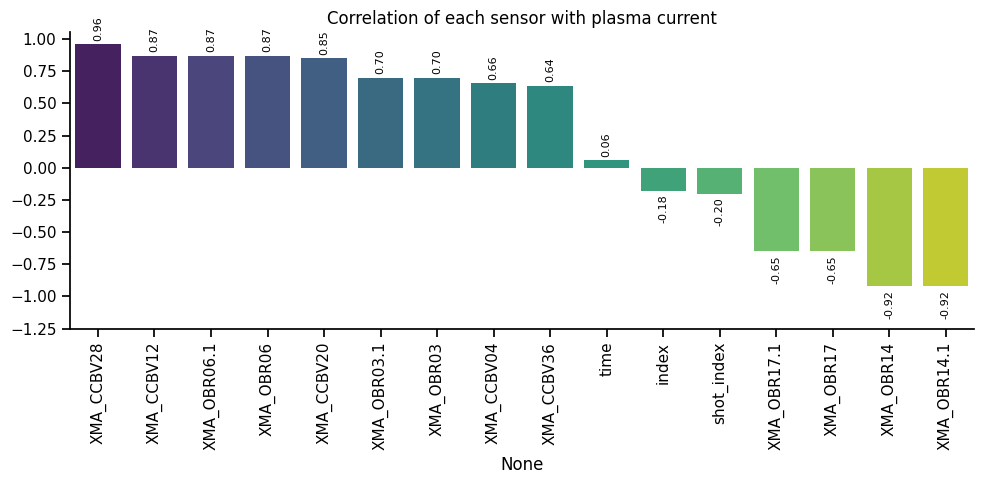

In [14]:
# --- Correlation with plasma current ---
corr = train.corr()["plasma_current"].drop("plasma_current")
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=corr.index, y=corr.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Correlation of each sensor with plasma current")
plt.tight_layout()
plt.yticks(np.arange(-1.25, 1.25, 0.25))
sns.despine()

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.03 * np.sign(height),  # slight offset above or below
        f"{height:.2f}",
        ha="center",
        va="bottom" if height >= 0 else "top",
        fontsize=8,
        rotation=90
    )
plt.show()

### Conclusion

* Descriptive statistics

_We see that the data from alll the captors are pretty gathered; the deviation never exceed 1 in absolute value. Same consideration for the means. Mostly of the means are positive and all are around 0.2 Volts in absolute value._
_In addition, it seems to be three pair of identic features. Thus, we could reduce the dimensionality by droping the redundant ones._

* Covariance matrix

_The covariance matrix confirms to us which was the captor with the highest standard deviation._
_Moreover, it confirms also that 3 colonns seems to have been duplicated. To be sure, we are going to calculate the MSE between colonns and verifying that it is null. (We need to make this check because means and variances can be equal without the data being equal.)_

* Time analysis for a given shot

_We can see that each shot passes throught similar phases: standby > ignition > constant > shut down > oscillations > standby._
_Otherwise, all captors don't contribute in the same manner and some are following very well the plsma current curve._

* Correlation with plasma current

_As we said just before, captors contribute mor or less to the current curve and some contribute positively whereas other negatively._


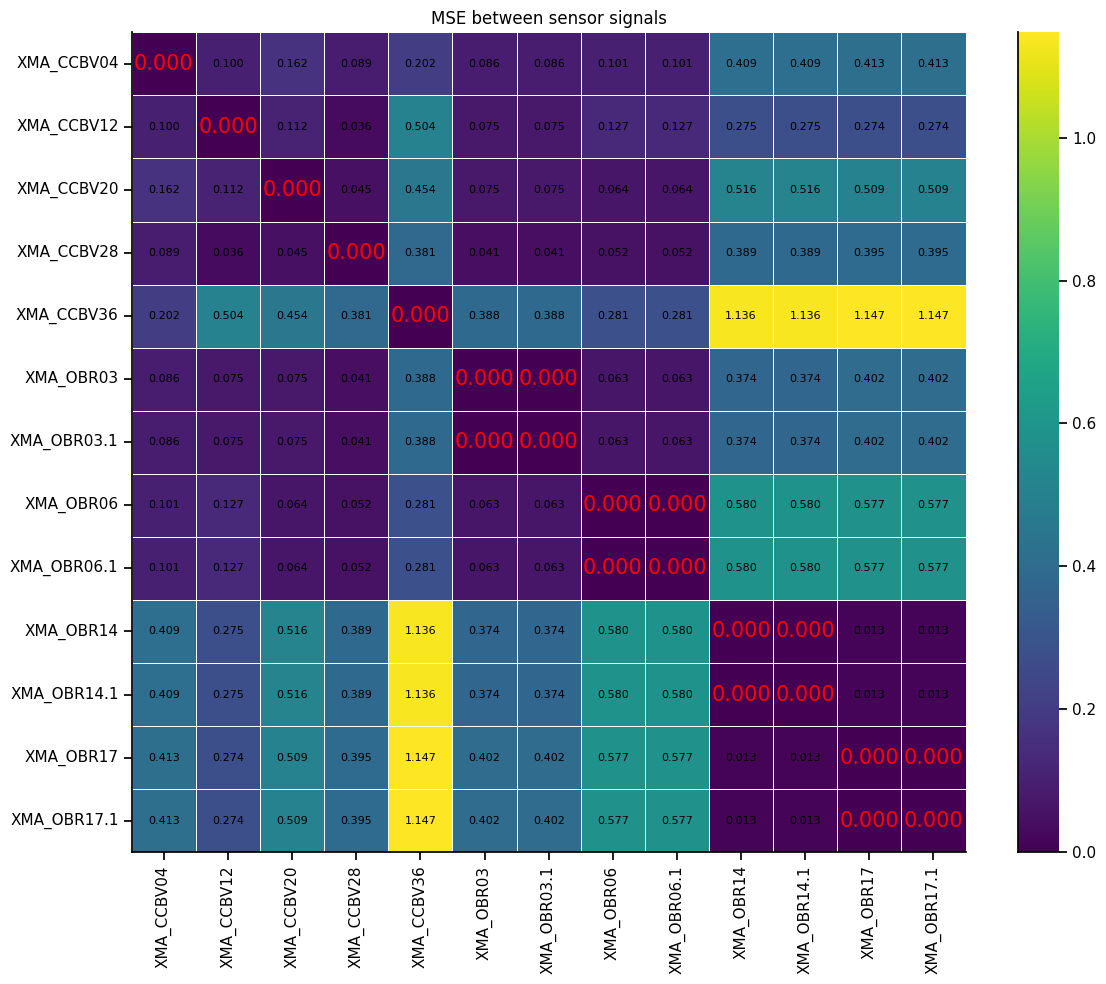

In [15]:
# Calculating MSE between each pair of sensors

columns = train_without_plasma_current.columns
mse_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

for i in columns:
    for j in columns:
        mse = sklearn.metrics.mean_squared_error(train_without_plasma_current[i], train_without_plasma_current[j])
        mse_matrix.loc[i, j] = mse

plt.figure(figsize=(12, 10))
ax = sns.heatmap(mse_matrix.astype(float), annot=False, fmt=".3f", cmap="viridis", linewidths=0.5)
plt.title("MSE between sensor signals")
sns.despine()
for y in range(mse_matrix.shape[0]):
    for x in range(mse_matrix.shape[1]):
        value = mse_matrix.iloc[y, x]
        color = "red" if np.isclose(value, 0.0) else "black"
        fontsize = 15 if np.isclose(value, 0.0) else 8
        ax.text(x + 0.5, y + 0.5, f"{value:.3f}", ha='center', va='center', color=color, fontsize=fontsize)

plt.tight_layout()
plt.show()

As a conclusion, we can perfectly remove some columns without affecting the results.

The columns to be removed are:

XMA_OBR03.1, XMA_OBR06.1, XMA_OBR14.1, XMA_OBR17.1

In [16]:
# Re-load the data
train = pd.read_csv(path / "train.csv")
test = pd.read_csv(path / "test.csv")

print(train.head(2))

   index     time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
0      0 -0.06560   -0.126953   -0.024414   -0.014648   -0.029297   -0.268555   
1      1 -0.06535   -0.129395   -0.024414   -0.017090   -0.031738   -0.273438   

   XMA_OBR03  XMA_OBR03.1  XMA_OBR06  XMA_OBR06.1  XMA_OBR14  XMA_OBR14.1  \
0  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
1  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   

   XMA_OBR17  XMA_OBR17.1  shot_index  plasma_current  
0  -0.021973    -0.021973           0       -0.673544  
1  -0.024414    -0.024414           0       -0.063172  


In [17]:
# Removing the unusefull columns
train2 = train.drop(columns=["index", "XMA_OBR03.1", "XMA_OBR06.1", "XMA_OBR14.1", "XMA_OBR17.1"])

train2.head(2)

,time,XMA_CCBV04,XMA_CCBV12,XMA_CCBV20,XMA_CCBV28,XMA_CCBV36,XMA_OBR03,XMA_OBR06,XMA_OBR14,XMA_OBR17,shot_index,plasma_current
0,-0.06560,-0.126953,-0.024414,-0.014648,-0.029297,-0.268555,-0.002441,-0.031738,-0.019531,-0.021973,0,-0.673544
1,-0.06535,-0.129395,-0.024414,-0.017090,-0.031738,-0.273438,-0.002441,-0.031738,-0.019531,-0.024414,0,-0.063172


## Data preprocessing

The aim is now to prepare the data for the neural network at the best.
So that, we are using preprocessing technics :

* Separation between train set and validation set

* Normalization of the data by values obtained in the train set. (Highly important for FFNN) We must do this on the train set only to avoid data leakage.

* PCA and dropping of the unusefull components. We must do this after the normalization for a better efficiency.

* 


__Louis Brusset__ _20/05/2025_

In [18]:
### Louis Brusset 20/05/2025

# Split the data into features and target variable
# Split the dqtq into test and train sets
X, y = train2.drop("plasma_current", axis=1), train.plasma_current
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3,
)

print("X_train", X_train.head(2), "\n")
print("X_valid", X_valid.head(2), "\n")
print("y_train", y_train.head(2), "\n")
print("y_valid", y_valid.head(2), "\n")

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_valid shape: ", X_valid.shape)
print("y_valid shape: ", y_valid.shape)

X_train          time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
9567  0.04230   -0.232219    0.073901    0.404958    0.150072   -0.456089   
3338  0.20155    0.154599    0.062889    0.527386    0.415890    0.523541   

      XMA_OBR03  XMA_OBR06  XMA_OBR14  XMA_OBR17  shot_index  
9567   0.184169   0.146538  -0.105853  -0.136849           4  
3338   0.498507   0.582946  -0.218244  -0.282142           1   

X_valid          time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
5498  0.74155    0.010268   -0.008382   -0.030105   -0.006292    0.023960   
7508 -0.00365   -0.429688   -0.043945   -0.029297   -0.048828   -0.849609   

      XMA_OBR03  XMA_OBR06  XMA_OBR14  XMA_OBR17  shot_index  
5498  -0.020552  -0.016656  -0.016305  -0.026723           1  
7508   0.026855   0.073242  -0.068359  -0.090332           3   

y_train 9567    216.455429
3338    414.032227
Name: plasma_current, dtype: float64 

y_valid 5498   -0.764023
7508    1.209276
Name: plasm

In [19]:
from sklearn.preprocessing import StandardScaler

# Normalization
nb_nan_rows1 = X_train.isna().any(axis=1).sum()
print(f"Number of Nan rows before : {nb_nan_rows1}")

scaler_for_X = StandardScaler()
columns_to_normalize = [col for col in X_train.columns if col.startswith("XMA_")]
X_train_norm_np = scaler_for_X.fit_transform(X_train[columns_to_normalize])
print("Means:", scaler_for_X.mean_)
print("Variances:", scaler_for_X.var_)
print("----------------------------------------------------------------------------------")
print("New means:", X_train_norm_np.mean(axis=0))
print("New stds:", X_train_norm_np.std(axis=0))

X_train_norm_df = pd.DataFrame(X_train_norm_np, columns=columns_to_normalize)
X_train_norm = pd.concat([X_train.iloc[:, 0].reset_index(drop=True),
                          X_train_norm_df.reset_index(drop=True),
                          X_train.iloc[:, -1].reset_index(drop=True)
                          ], axis=1)

nb_nan_rows2 = X_train_norm.isna().any(axis=1).sum()
print(f"Number of Nan rows after : {nb_nan_rows2}")



Number of Nan rows before : 0
Means: [ 0.22069983  0.17494916  0.35936334  0.2757621   0.45762992  0.30043374
  0.42682501 -0.21006541 -0.21512346]
Variances: [0.13739253 0.06492475 0.11253434 0.07963552 0.53981719 0.05582449
 0.08858609 0.01634307 0.02050868]
----------------------------------------------------------------------------------
New means: [-2.09550176e-18 -9.11543264e-18  6.78942569e-17 -4.69392394e-17
 -5.86740492e-18 -8.83253991e-17  1.25730105e-17  1.63449137e-16
  1.42075019e-16]
New stds: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Number of Nan rows after : 0


In [20]:
print(X_train_norm.head(2))

      time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
0  0.04230   -1.221908   -0.396572    0.135916   -0.445398   -1.243624   
1  0.20155   -0.178331   -0.439789    0.500870    0.496558    0.089708   

   XMA_OBR03  XMA_OBR06  XMA_OBR14  XMA_OBR17  shot_index  
0  -0.492080  -0.941716   0.815181   0.546574           4  
1   0.838328   0.524539  -0.063976  -0.467982           1  


In [21]:
print(X_train_norm_df.head(2))


   XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  XMA_OBR03  \
0   -1.221908   -0.396572    0.135916   -0.445398   -1.243624  -0.492080   
1   -0.178331   -0.439789    0.500870    0.496558    0.089708   0.838328   

   XMA_OBR06  XMA_OBR14  XMA_OBR17  
0  -0.941716   0.815181   0.546574  
1   0.524539  -0.063976  -0.467982  


In [22]:
scaler_for_y = StandardScaler()

nb_nan_rows1 = y_train.isna().sum()
print(f"Number of Nan rows before : {nb_nan_rows1}")

y_train_np = y_train.values.reshape(-1, 1)
y_train_norm_np = scaler_for_y.fit_transform(y_train_np)

# Vérification
print("Mean (before scaling):", scaler_for_y.mean_)
print("Variance (before scaling):", scaler_for_y.var_)
print("--------------------------------------------------")
print("New mean:", y_train_norm_np.mean())
print("New std:", y_train_norm_np.std())

y_train_norm = pd.Series(y_train_norm_np.flatten())

nb_nan_rows2 = y_train_norm.isna().sum()
print(f"Number of Nan rows after : {nb_nan_rows2}")


Number of Nan rows before : 0
Mean (before scaling): [348.04868717]
Variance (before scaling): [78925.67840347]
--------------------------------------------------
New mean: 7.585716360303063e-17
New std: 0.9999999999999999
Number of Nan rows after : 0


Thanksfully, there are no Nan in y_train_norm. Thus we create a mask with X_train_norm and apply it on both the series because 6700 data is enough for our network.

[22/05/2025 update]: by reseting the index, we find now 0 Nan numbers. Thus, our mistake was with the mismatch of lines during the concatenation.

In [23]:
# Boolean mask: True for non-NaN lines
mask = ~X_train_norm.isna().any(axis=1)

X_train_norm_clean = X_train_norm[mask]
y_train_norm_clean = y_train_norm[mask]

print(f"X shape after cleaning: {X_train_norm_clean.shape}")
print(f"y shape after cleaning: {y_train_norm_clean.shape}")

X_train_norm_df_clean = X_train_norm_df[mask]
print(f"X_train_norm_df_clean shape: {X_train_norm_df_clean.shape}")

X shape after cleaning: (8477, 11)
y shape after cleaning: (8477,)
X_train_norm_df_clean shape: (8477, 9)


Variance explained by each principal component:
PC           Percentage         Cumulative percentage
PC1:         71.86%              71.86%
PC2:         10.56%              82.42%
PC3:         7.27%              89.69%
PC4:         5.15%              94.84%
PC5:         2.58%              97.42%
PC6:         1.46%              98.88%
PC7:         1.01%              99.88%
PC8:         0.08%              99.96%
PC9:         0.04%              100.00%


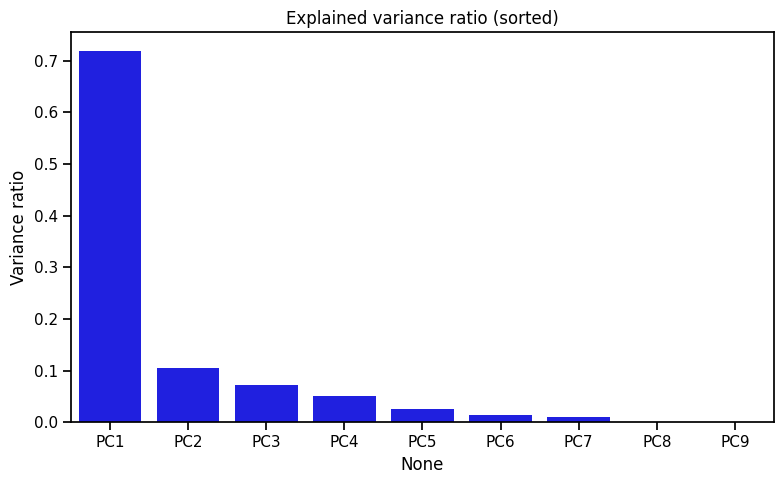

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_train_norm_df_clean)

explained_var = pd.Series(pca.explained_variance_ratio_, index=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))])
explained_var_sorted = explained_var.sort_values(ascending=False)
print("Variance explained by each principal component:")
print("PC          ", "Percentage        ", "Cumulative percentage")
for pc, value in explained_var_sorted.items():
    print(f"{pc}:         {value * 100:.2f}%              {explained_var_sorted.cumsum()[pc] * 100:.2f}%")

plt.figure(figsize=(8, 5))
sns.barplot(x=explained_var_sorted.index, y=explained_var_sorted.values, color="b")
plt.title("Explained variance ratio (sorted)")
plt.ylabel("Variance ratio")
plt.tight_layout()
plt.show()

PCA shows that the 5 last components are not usefull in the determination of the plasma current.
The last 5 explain less than 5% of the variance, whereas the other explain together 95% of the total variance.
So we are dropping them and focus on the 4 first.

In [25]:
n_components_to_keep = X_pca.shape[1] - 5
X_pca_reduced = X_pca[:, :n_components_to_keep]

print(f"Shape after reduction: {X_pca_reduced.shape}")

Shape after reduction: (8477, 4)


In [26]:
X_preprocessed = X_pca_reduced
y_preprocessed = y_train_norm_clean.values

print(f"X type:   {type(X_preprocessed)}")
print(f"y type:   {type(y_preprocessed)}")
print(f"X shape:  {X_preprocessed.shape}")
print(f"y shape:  {y_preprocessed.shape}")

X type:   <class 'numpy.ndarray'>
y type:   <class 'numpy.ndarray'>
X shape:  (8477, 4)
y shape:  (8477,)


## Feedfordward Neural Network

Now we implement the neural network with 3 hidden layer and fully-connected.

__Louis Brusset__ _20/05/2025_

In [27]:
from sklearn.neural_network import MLPRegressor

# hidden_layer_sizes=(64, 32, 16) for instance
model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=3
)

In [28]:
### Louis Brusset 21/05/2025
# Fit the model

model.fit(X_preprocessed, y_preprocessed)

MLPRegressor(hidden_layer_sizes=(64, 32, 16), max_iter=500, random_state=3)

In [29]:
y_pred = model.predict(X_preprocessed)

print("Coût final (loss) :", model.loss_)

Coût final (loss) : 0.0004575147831745006


### Test of the model

In [30]:
## Preprocessing of the validation set

# Normalization
print("Normalization ----------------------------------")
X_valid_norm_np = scaler_for_X.transform(X_valid[columns_to_normalize])
print("shape of X_valid_norm_np:", X_valid_norm_np.shape)
print("New means:", X_valid_norm_np.mean(axis=0))
print("New stds:", X_valid_norm_np.std(axis=0))
print("")

# Checking for NaN values
print("Checking for NaN values ------------------------")
X_valid_norm_df = pd.DataFrame(X_valid_norm_np, columns=columns_to_normalize)	
nb_nan_rows1 = X_valid_norm_df.isna().any(axis=1).sum()
print(f"Number of Nan rows before : {nb_nan_rows1}")
# mask = ~X_valid_norm_df.isna().any(axis=1)
# X_valid_norm = pd.concat([X_valid.iloc[:, 0], X_valid_norm_df, X_valid.iloc[:, -1]], axis=1)
# X_valid_norm_clean = X_valid_norm[mask]
# nb_nan_rows2 = X_valid_norm_clean.isna().any(axis=1).sum()
# print(f"Number of Nan rows after : {nb_nan_rows2}")
print(f"shape of X_valid after cleaning: {X_valid_norm_np.shape}")
print("")

# PCA
print("PCA -------------------------------------------")
X_valid_pca = pca.transform(X_valid_norm_np)
n_components_to_keep_validation = X_valid_pca.shape[1] - 5
X_valid_pca_reduced = X_valid_pca[:, :n_components_to_keep_validation]
print("shape of X_valid_pca:", X_valid_pca_reduced.shape)



Normalization ----------------------------------
shape of X_valid_norm_np: (2120, 9)
New means: [ 0.00494551 -0.02482281 -0.00743194 -0.00950384  0.00815349  0.00559074
 -0.01317632  0.0191642   0.00145609]
New stds: [0.98267143 0.97496663 1.00918961 0.99247628 0.98929816 1.02590173
 0.99779591 0.99098865 1.00435462]

Checking for NaN values ------------------------
Number of Nan rows before : 0
shape of X_valid after cleaning: (2120, 9)

PCA -------------------------------------------
shape of X_valid_pca: (2120, 4)


/home/ITER/brussel/brusselenv/lib64/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [31]:
# Test the model
y_valid_pred = model.predict(X_valid_pca_reduced)
print("shape of y_valid_pred:", y_valid_pred.shape)
y_valid_pred = scaler_for_y.inverse_transform(y_valid_pred.reshape(-1, 1))
print("shape of y_valid_pred after scaling inverse transform:", y_valid_pred.shape)


shape of y_valid_pred: (2120,)
shape of y_valid_pred after scaling inverse transform: (2120, 1)


In [32]:
# MAPE score

score = sklearn.metrics.mean_absolute_percentage_error(y_valid, y_valid_pred)
print(f"MAPE {score:1.3f}")

MAPE 2.557


In [33]:
### Function to inverse PCA transformation:
#X_approx = pca.inverse_transform(X_pca_reduced)

#### Observations

The MAPE score of new FFNN model is far more better than the previous one with linear regression.

Now, we are goint to try to fine tune the hyperparameter (here the learning rate) with ensemble methods.

In [34]:
# List of learning rates to test
learning_rates = np.logspace(-5, -1, num=50)
results = []

for lr in learning_rates:
    model = MLPRegressor(
        hidden_layer_sizes=(64, 32, 16),
        activation='relu',
        solver='adam',
        learning_rate_init=lr,
        max_iter=500,
        random_state=3
    )
    model.fit(X_preprocessed, y_preprocessed.flatten())
    y_pred = model.predict(X_valid_pca_reduced)
    y_pred = scaler_for_y.inverse_transform(y_pred.reshape(-1, 1))

    # Calculate MAPE
    mape = sklearn.metrics.mean_absolute_percentage_error(y_valid, y_pred)
    results.append((lr, mape))
    print(f"Learning rate: {lr:.3e} --- MAPE: {mape:.4f}")

# Best LR
best_lr, best_mape = min(results, key=lambda x: x[1])
print("\n Best learning rate:", best_lr)
print("Corresponding MSE:", best_mape)

Learning rate: 1.000e-05 --- MAPE: 3.6272
Learning rate: 1.207e-05 --- MAPE: 3.5020
Learning rate: 1.456e-05 --- MAPE: 3.2201
Learning rate: 1.758e-05 --- MAPE: 3.0666
Learning rate: 2.121e-05 --- MAPE: 2.9212
Learning rate: 2.560e-05 --- MAPE: 2.7661
Learning rate: 3.089e-05 --- MAPE: 2.6766
Learning rate: 3.728e-05 --- MAPE: 2.6090
Learning rate: 4.498e-05 --- MAPE: 2.5064
Learning rate: 5.429e-05 --- MAPE: 2.3941
Learning rate: 6.551e-05 --- MAPE: 2.2973
Learning rate: 7.906e-05 --- MAPE: 2.3378
Learning rate: 9.541e-05 --- MAPE: 2.4896
Learning rate: 1.151e-04 --- MAPE: 3.1648
Learning rate: 1.389e-04 --- MAPE: 2.8208
Learning rate: 1.677e-04 --- MAPE: 2.3564
Learning rate: 2.024e-04 --- MAPE: 2.4148
Learning rate: 2.442e-04 --- MAPE: 2.0433
Learning rate: 2.947e-04 --- MAPE: 2.2143
Learning rate: 3.556e-04 --- MAPE: 2.2006
Learning rate: 4.292e-04 --- MAPE: 2.3879
Learning rate: 5.179e-04 --- MAPE: 2.8532
Learning rate: 6.251e-04 --- MAPE: 2.8792
Learning rate: 7.543e-04 --- MAPE:

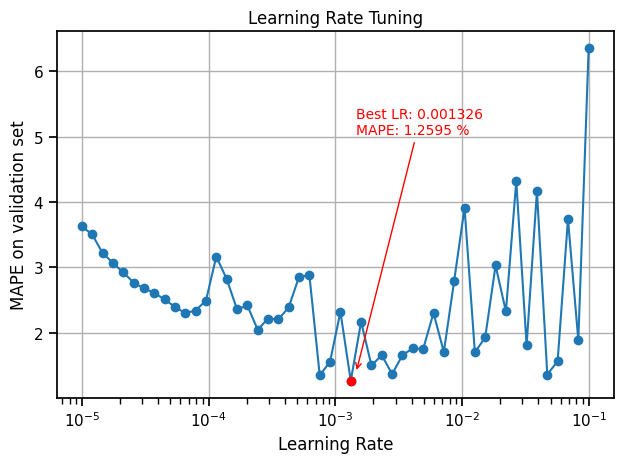

In [42]:
lrs, mses = zip(*results)
plt.plot(lrs, mses, marker='o')
plt.scatter(best_lr, best_mape, color='red', zorder=5, label='Best')
plt.annotate(f'Best LR: {best_lr:.4g}\nMAPE: {best_mape:.4f} %',
             xy=(best_lr*1.1, best_mape*1.1),
             xytext=(best_lr*1.1, best_mape*4),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('MAPE on validation set')
plt.title('Learning Rate Tuning')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
if False:       # running time for this cell: around 10 minutes


    # Lists of learning rates, activation function, solver to test
    learning_rates = np.logspace(-5, -1, num=50)
    activation_functions = ['logistic', 'tanh', 'relu']
    equation_solvers = ['adam', 'sgd']
    results = []

    for lr in learning_rates:
        for af in activation_functions:
            for es in equation_solvers:
                print(f"Testing with learning rate: {lr:.3e}, activation function: {af}, solver: {es}")
                model = MLPRegressor(
                    hidden_layer_sizes=(64, 32, 16),
                    max_iter=500,
                    random_state=3,
                    alpha=0.0001,
                    beta_1=0.9,
                    warm_start=True,
                    learning_rate='adaptive',
                    learning_rate_init=lr,
                    activation=af,
                    solver=es
                )
                model.fit(X_preprocessed, y_preprocessed.flatten())
                y_pred = model.predict(X_valid_pca_reduced)
                y_pred = scaler_for_y.inverse_transform(y_pred.reshape(-1, 1))

                # Calculate MAPE
                mape = sklearn.metrics.mean_absolute_percentage_error(y_valid, y_pred)
                results.append((lr, af, es, mape))
                print(f"---- MAPE: {mape:.4f} ----")
        

    # Best parameters
    best_lr, best_af, best_es, best_mape = min(results, key=lambda x: x[3])
    print("\nBest parameters:", best_lr, best_af, best_es)
    print("Corresponding MSE:", best_mape)

# After running it one time, here are the results:
#   Best parameters: 0.05689866029018293 tanh adam
#   Corresponding MSE: 0.9811846476213268 %

else:
    best_lr = 0.05689866029018293
    best_af = 'tanh'
    best_es = 'adam'
    best_mape = 0.9811846476213268

### Conclusion

We obtain the best results with those parameters:
* learning rate:       0.05689866029018293
* activation function: tanh
* solver:              adam

=> corresponding MAPE: 0.98 %.

It is a great amelioration of the linear regression model and we succeeded in finetuning our hyperparameter to the best.

Let see what are the results on the test set...

In [48]:
test.head(2)

,index,time,XMA_CCBV04,XMA_CCBV12,XMA_CCBV20,XMA_CCBV28,XMA_CCBV36,XMA_OBR03,XMA_OBR03.1,XMA_OBR06,XMA_OBR06.1,XMA_OBR14,XMA_OBR14.1,XMA_OBR17,XMA_OBR17.1,shot_index
0,0,-0.06120,-0.146484,-0.026855,-0.017090,-0.036621,-0.317383,-0.009766,-0.009766,-0.017090,-0.017090,-0.026855,-0.026855,-0.024414,-0.024414,5
1,1,-0.06095,-0.146484,-0.029297,-0.014648,-0.036621,-0.319824,-0.007324,-0.007324,-0.014648,-0.014648,-0.026855,-0.026855,-0.024414,-0.024414,5


In [49]:
# Preprocessing of the test set
# Normalization
print("Normalization ----------------------------------")
X_test_norm_np = scaler_for_X.transform(test[columns_to_normalize])
print("shape of X_test_norm_np:", X_test_norm_np.shape)
print("New means:", X_test_norm_np.mean(axis=0))
print("New stds:", X_test_norm_np.std(axis=0))
print("")
# Checking for NaN values
print("Checking for NaN values ------------------------")
X_test_norm_df = pd.DataFrame(X_test_norm_np, columns=columns_to_normalize)
nb_nan_rows1 = X_test_norm_df.isna().any(axis=1).sum()
print("Number of rows with NaN values:", nb_nan_rows1)
# PCA
print("PCA -------------------------------------------")
X_test_pca = pca.transform(X_test_norm_np)
n_components_to_keep_test = X_test_pca.shape[1] - 5
X_test_pca_reduced = X_test_pca[:, :n_components_to_keep_test]
print("shape of X_test_pca:", X_test_pca_reduced.shape)



Normalization ----------------------------------
shape of X_test_norm_np: (4325, 9)
New means: [ 0.05548521  0.58286071 -0.08464973  0.13666206 -0.04184355 -0.1484095
  0.23917384 -0.46425313  0.48946039]
New stds: [0.99282678 1.29367564 0.80664446 1.16899477 0.94683837 0.79355546
 0.99580232 1.08862122 0.58534281]

Checking for NaN values ------------------------
Number of rows with NaN values: 0
PCA -------------------------------------------
shape of X_test_pca: (4325, 4)


/home/ITER/brussel/brusselenv/lib64/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [50]:
# Create the model with the best parameters
model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    max_iter=500,
    random_state=3,
    alpha=0.0001,
    beta_1=0.9,
    warm_start=True,
    learning_rate='adaptive',
    learning_rate_init=best_lr,
    activation=best_af,
    solver=best_es
)
model.fit(X_preprocessed, y_preprocessed.flatten())     # Warning: train with the training set!!

MLPRegressor(activation='tanh', hidden_layer_sizes=(64, 32, 16),
             learning_rate='adaptive', learning_rate_init=0.05689866029018293,
             max_iter=500, random_state=3, warm_start=True)

In [51]:
# Test the model
y_test_pred = model.predict(X_test_pca_reduced)
print("shape of y_test_pred:", y_test_pred.shape)
y_test_pred = scaler_for_y.inverse_transform(y_test_pred.reshape(-1, 1))
print("shape of y_test_pred after scaling inverse transform:", y_test_pred.shape)

shape of y_test_pred: (4325,)
shape of y_test_pred after scaling inverse transform: (4325, 1)


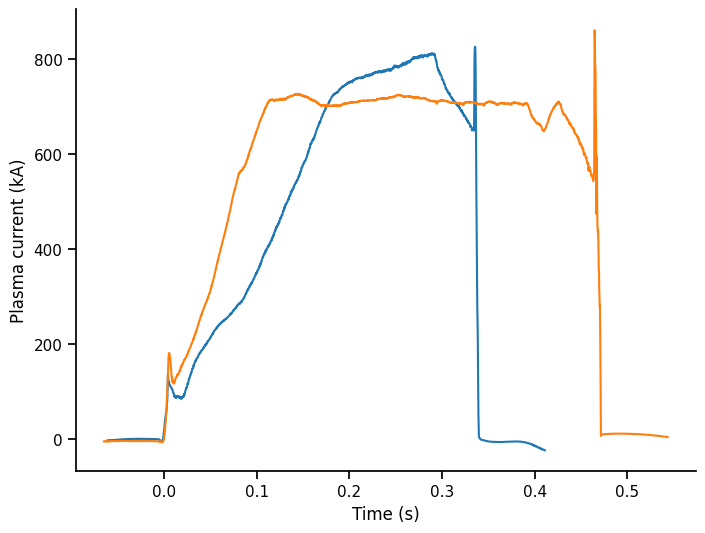

In [52]:
sns.set_context("notebook")
axes = plt.subplots(figsize=(8, 6))[1]


for shot_index in np.unique(test.shot_index):
    index = test.shot_index == shot_index

    axes.plot(test.loc[index, "time"], y_test_pred[index])

axes.set_xlabel("Time (s)")
axes.set_ylabel("Plasma current (kA)")
sns.despine()
plt.show()

## FFNN - Conclusion

We cannot calculate du MAPE for the test set because there are no target values. However, the plot of the supposed plasma currant seems to be coherant.

Let try to change our improve Neural Network by taking into account the past in each shot. We are going to implement a Recurrent Neural Network (RNN).

# Recurrent Neural Network

First implementation.

We are going to use Gated Recurrent Unit instead of Long Short-Term Memory because of its capability to be quick and less sensitive to over-fitting. In addition LSTM could overfit if the dataset is too short (the case here) and LSTM are specially good for long-term temporal dependencies (we need the contrary here, because of the different phases of the signal).

The lack of data is a big issue here. That is why, we will use GRU. Otherwise, we will pre-calculate derivatives of our inputs to double the number of inputs and to give to the model more information about physics of the sensors.

As we need to build a RNN, we must have the tenserflow librairy.



__Louis Brusset__ _21/05/2025_

In [53]:
print(train.head(2))

   index     time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
0      0 -0.06560   -0.126953   -0.024414   -0.014648   -0.029297   -0.268555   
1      1 -0.06535   -0.129395   -0.024414   -0.017090   -0.031738   -0.273438   

   XMA_OBR03  XMA_OBR03.1  XMA_OBR06  XMA_OBR06.1  XMA_OBR14  XMA_OBR14.1  \
0  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   
1  -0.002441    -0.002441  -0.031738    -0.031738  -0.019531    -0.019531   

   XMA_OBR17  XMA_OBR17.1  shot_index  plasma_current  
0  -0.021973    -0.021973           0       -0.673544  
1  -0.024414    -0.024414           0       -0.063172  


In [54]:
train_sorted = train.sort_values(by=['shot_index', 'time']).reset_index(drop=True)
train_sorted = train_sorted.drop(columns=["index", "XMA_OBR03.1", "XMA_OBR06.1", "XMA_OBR14.1", "XMA_OBR17.1"])

train_sorted.head(2)

,time,XMA_CCBV04,XMA_CCBV12,XMA_CCBV20,XMA_CCBV28,XMA_CCBV36,XMA_OBR03,XMA_OBR06,XMA_OBR14,XMA_OBR17,shot_index,plasma_current
0,-0.06560,-0.126953,-0.024414,-0.014648,-0.029297,-0.268555,-0.002441,-0.031738,-0.019531,-0.021973,0,-0.673544
1,-0.06535,-0.129395,-0.024414,-0.017090,-0.031738,-0.273438,-0.002441,-0.031738,-0.019531,-0.024414,0,-0.063172


In [55]:
## Louis Brusset 22/05/2025

# Find the derivative of each features
xma_cols = [col for col in train_sorted.columns if col.startswith("XMA_")]
for col in xma_cols:
    d_col = "d_" + col
    train_sorted[d_col] = train_sorted.groupby("shot_index").apply(
        lambda group: group[col].diff() / group["time"].diff()
    ).reset_index(level=0, drop=True)

# Delete Nan values that appear in the derivative calculation
train3 = train_sorted.dropna(subset=["d_" + col for col in xma_cols])
train3 = train3.reset_index(drop=True)      # Reindexation

# Verification
train3[[*xma_cols[:2], f'd_{xma_cols[0]}', f'd_{xma_cols[1]}']].head()
#train3.head()

/tmp/ipykernel_2874584/1793225503.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_sorted[d_col] = train_sorted.groupby("shot_index").apply(
/tmp/ipykernel_2874584/1793225503.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_sorted[d_col] = train_sorted.groupby("shot_index").apply(
/tmp/ipykernel_2874584/1793225503.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping co

,XMA_CCBV04,XMA_CCBV12,d_XMA_CCBV04,d_XMA_CCBV12
0,-0.129395,-0.024414,-9.765625,0.0
1,-0.129395,-0.024414,0.000000,0.0
2,-0.131836,-0.024414,-9.765625,0.0
3,-0.131836,-0.024414,0.000000,0.0
4,-0.131836,-0.024414,0.000000,0.0


/tmp/ipykernel_2874584/3542221619.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr.index, y=corr.values, palette="viridis")


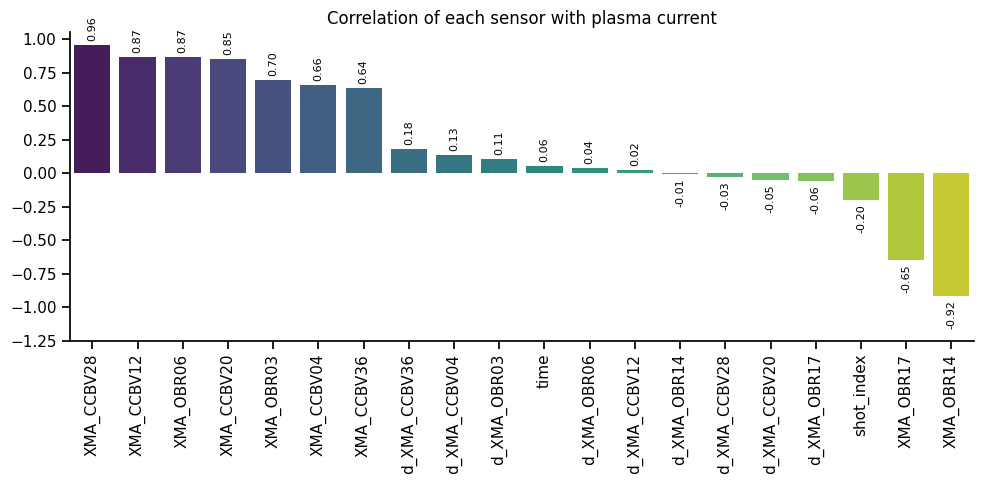

In [56]:
## Louis Brusset 22/05/2025

# One visualisation to well understand the correlation between derivatives and plasma current
# --- Correlation with plasma current ---
corr = train3.corr()["plasma_current"].drop("plasma_current")
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=corr.index, y=corr.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("")
plt.title("Correlation of each sensor with plasma current")
plt.tight_layout()
plt.yticks(np.arange(-1.25, 1.25, 0.25))
sns.despine()

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.03 * np.sign(height),  # slight offset above or below
        f"{height:.2f}",
        ha="center",
        va="bottom" if height >= 0 else "top",
        fontsize=8,
        rotation=90
    )
plt.show()

Derivatives of the sensors have a slightly effect on the variance of the plasma current. Thus, we are finally not going to use them.

It will be the same process of preprocessing but we are going to give more information to the train test by using au valisation over train number of sample ratio at 0.15.

In addition, every sample must have the time in its features.

In [57]:
train3 = train3.drop(["d_XMA_CCBV04",
                      "d_XMA_CCBV12",
                      "d_XMA_CCBV20",
                      "d_XMA_CCBV28",
                      "d_XMA_CCBV36",
                      "d_XMA_OBR03",
                      "d_XMA_OBR06",
                      "d_XMA_OBR14",
                      "d_XMA_OBR17"], axis=1)
train3.head(3)

,time,XMA_CCBV04,XMA_CCBV12,XMA_CCBV20,XMA_CCBV28,XMA_CCBV36,XMA_OBR03,XMA_OBR06,XMA_OBR14,XMA_OBR17,shot_index,plasma_current
0,-0.06535,-0.129395,-0.024414,-0.01709,-0.031738,-0.273438,-0.002441,-0.031738,-0.019531,-0.024414,0,-0.063172
1,-0.06510,-0.129395,-0.024414,-0.01709,-0.034180,-0.275879,-0.002441,-0.031738,-0.019531,-0.021973,0,1.417663
2,-0.06485,-0.131836,-0.024414,-0.01709,-0.031738,-0.278320,-0.002441,-0.031738,-0.019531,-0.021973,0,1.299676


In [58]:
### Louis Brusset 22/05/2025

# Split the data into features and target variable
# Split the dqtq into test and train sets
X, y = train3.drop("plasma_current", axis=1), train3.plasma_current
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.15,
    shuffle=True,
    random_state=3,
)

print("X_train", X_train.head(2), "\n")
print("X_valid", X_valid.head(2), "\n")
print("y_train", y_train.head(2), "\n")
print("y_valid", y_valid.head(2), "\n")

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_valid shape: ", X_valid.shape)
print("y_valid shape: ", y_valid.shape)

X_train          time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
9959  0.14155    0.391276    0.206961    0.665385    0.429993    0.750595   
5251  0.68030    0.255814   -0.014194   -0.057888   -0.006598    0.515606   

      XMA_OBR03  XMA_OBR06  XMA_OBR14  XMA_OBR17  shot_index  
9959   1.154047   0.510517  -0.281902  -0.612831           4  
5251   0.031014   0.011765  -0.021178  -0.032584           1   

X_valid          time  XMA_CCBV04  XMA_CCBV12  XMA_CCBV20  XMA_CCBV28  XMA_CCBV36  \
3074  0.13605    0.041764    0.072984    0.738048    0.406079    0.202186   
5018  0.62205    0.715102    0.014865    0.059656    0.288959    2.320443   

      XMA_OBR03  XMA_OBR06  XMA_OBR14  XMA_OBR17  shot_index  
3074   0.505609   0.481484  -0.216721  -0.277207           1  
5018   0.384567   0.288951  -0.031839  -0.221681           1   

y_train 9959    504.115509
5251    -14.638021
Name: plasma_current, dtype: float64 

y_valid 3074    429.723816
5018    133.146790
Name: p

In [59]:
# Normalization
nb_nan_rows1 = X_train.isna().any(axis=1).sum()
print(f"Number of Nan rows before : {nb_nan_rows1}")

scaler_for_X = StandardScaler()
columns_to_normalize = [col for col in X_train.columns if col.startswith("XMA_") or col.startswith("d_XMA_")]
X_train_norm_np = scaler_for_X.fit_transform(X_train[columns_to_normalize])
print("Means:", scaler_for_X.mean_)
print("Variances:", scaler_for_X.var_)
print("----------------------------------------------------------------------------------")
print("New means:", X_train_norm_np.mean(axis=0))
print("New stds:", X_train_norm_np.std(axis=0))

X_train_norm_df = pd.DataFrame(X_train_norm_np, columns=columns_to_normalize)
X_train_norm = pd.concat([X_train.iloc[:, 0].reset_index(drop=True),
                          X_train_norm_df.reset_index(drop=True),
                          X_train.iloc[:, -1].reset_index(drop=True)
                          ], axis=1)

nb_nan_rows2 = X_train_norm.isna().any(axis=1).sum()
print(f"Number of Nan rows after : {nb_nan_rows2}")


Number of Nan rows before : 0
Means: [ 0.21970851  0.17377669  0.35848568  0.2748526   0.45591405  0.29975603
  0.4265368  -0.20984248 -0.21469006]
Variances: [0.13730591 0.06484465 0.1127092  0.07983647 0.53948355 0.0563193
 0.08879708 0.01633589 0.02056008]
----------------------------------------------------------------------------------
New means: [-5.76137062e-17 -4.51833518e-17  2.60445521e-17  6.03760072e-17
 -9.47074623e-18 -2.72283954e-17 -4.41968157e-17  1.70868047e-16
  1.77576492e-16]
New stds: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Number of Nan rows after : 0


In [60]:
scaler_for_y = StandardScaler()

nb_nan_rows1 = y_train.isna().sum()
print(f"Number of Nan rows before : {nb_nan_rows1}")

y_train_np = y_train.values.reshape(-1, 1)
y_train_norm_np = scaler_for_y.fit_transform(y_train_np)

# Vérification
print("Mean (before scaling):", scaler_for_y.mean_)
print("Variance (before scaling):", scaler_for_y.var_)
print("--------------------------------------------------")
print("New mean:", y_train_norm_np.mean())
print("New std:", y_train_norm_np.std())

y_train_norm = pd.Series(y_train_norm_np.flatten())

nb_nan_rows2 = y_train_norm.isna().sum()
print(f"Number of Nan rows after : {nb_nan_rows2}")

Number of Nan rows before : 0
Mean (before scaling): [347.03245794]
Variance (before scaling): [79026.74357686]
--------------------------------------------------
New mean: 4.3012972452433033e-17
New std: 1.0000000000000002
Number of Nan rows after : 0


In [61]:
# Boolean mask: True for non-NaN lines
mask = ~X_train_norm.isna().any(axis=1)

X_train_norm_clean = X_train_norm[mask]
y_train_norm_clean = y_train_norm[mask]

print(f"X shape after cleaning: {X_train_norm_clean.shape}")
print(f"y shape after cleaning: {y_train_norm_clean.shape}")
print("Type of X_train_norm_clean", type(X_train_norm_clean))

X_train_norm_df_clean = X_train_norm_df[mask]
print(f"X_train_norm_df_clean shape: {X_train_norm_df_clean.shape}")

X shape after cleaning: (9003, 11)
y shape after cleaning: (9003,)
Type of X_train_norm_clean <class 'pandas.core.frame.DataFrame'>
X_train_norm_df_clean shape: (9003, 9)


Variance explained by each principal component:
PC           Percentage         Cumulative percentage
PC1:         71.92%              71.92%
PC2:         10.55%              82.47%
PC3:         7.30%              89.77%
PC4:         5.12%              94.89%
PC5:         2.54%              97.43%
PC6:         1.46%              98.89%
PC7:         1.00%              99.89%
PC8:         0.07%              99.96%
PC9:         0.04%              100.00%


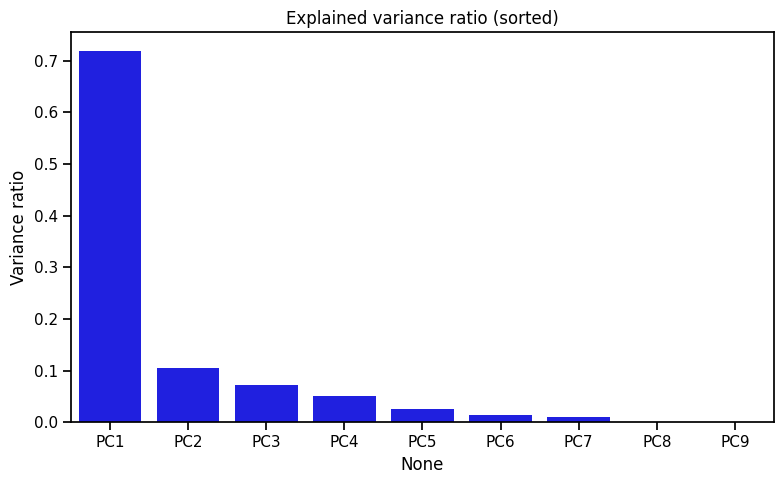

In [62]:
pca = PCA()
X_pca = pca.fit_transform(X_train_norm_df_clean)

explained_var = pd.Series(pca.explained_variance_ratio_, index=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))])
explained_var_sorted = explained_var.sort_values(ascending=False)
print("Variance explained by each principal component:")
print("PC          ", "Percentage        ", "Cumulative percentage")
for pc, value in explained_var_sorted.items():
    print(f"{pc}:         {value * 100:.2f}%              {explained_var_sorted.cumsum()[pc] * 100:.2f}%")

plt.figure(figsize=(8, 5))
sns.barplot(x=explained_var_sorted.index, y=explained_var_sorted.values, color="b")
plt.title("Explained variance ratio (sorted)")
plt.ylabel("Variance ratio")
plt.tight_layout()
plt.show()

In [63]:
n_components_to_keep = X_pca.shape[1] - 5
X_pca_reduced = X_pca[:, :n_components_to_keep]

print(f"Shape after reduction: {X_pca_reduced.shape}")

Shape after reduction: (9003, 4)


In [64]:
X_preprocessed = np.concatenate([
    X_train_norm_clean["time"].to_numpy().reshape(-1, 1), 
    X_pca_reduced, 
    X_train_norm_clean["shot_index"].to_numpy().reshape(-1, 1)
], axis=1)

y_preprocessed = y_train_norm_clean.values

print("X_preprocessed shape", X_preprocessed.shape)
print("y_preprocessed shape", y_preprocessed.shape)

X_preprocessed

X_preprocessed shape (9003, 6)
y_preprocessed shape (9003,)


array([[ 0.14154974, -3.1703194 , -0.56743971, -3.38684137, -0.0224204 ,
         4.        ],
       [ 0.68029976,  2.70928886, -1.07442708,  0.78427316,  0.42876321,
         1.        ],
       [ 0.37169975,  2.92529514, -0.96325487,  0.54652482,  0.22420114,
         2.        ],
       ...,
       [ 0.11654974, -2.32026499,  0.59187143, -2.73232226, -0.066622  ,
         4.        ],
       [ 0.35664999, -2.92211045, -0.21053866,  0.60865342,  0.38533001,
         0.        ],
       [ 0.06094975,  1.46031254,  1.25441926,  0.1486807 , -0.74756949,
         2.        ]])

#### Training of the RNN

__Louis Brusset__ _22/05/2025_

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

2025-05-22 16:18:39.262482: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 16:18:39.284820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747923519.301917 2874584 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747923519.307070 2874584 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747923519.320566 2874584 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [66]:
tf.config.list_physical_devices('GPU')

W0000 00:00:1747923532.892062 2874584 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[]

In [67]:
SEED = 42
tf.random.set_seed(SEED)

In [68]:
# Preparation of the sequences

def create_sequences(X, y):
    """Group by shot_index and build the time sequences"""
    sequences_X = []
    sequences_y = []

    unique_shots = np.unique(X[:, -1])
    for shot in unique_shots:
        mask = X[:, -1] == shot
        X_shot = X[mask][:, :-1]  # remove shot_index
        y_shot = y[mask]

        sequences_X.append(X_shot)
        sequences_y.append(y_shot)

    return sequences_X, sequences_y

X_seqs, y_seqs = create_sequences(X_preprocessed, y_preprocessed)

print("X_seqs length: ", len(X_seqs))

X_seqs length: 
5


In [79]:
## We must keep in memory the maximum timestep for the validation set and the inferance.

lengths = [len(seq) for seq in X_seqs]
max_timesteps = max(lengths)

print("Maximum timestep:", max_timesteps)

Maximum timestep: 2746


In [70]:
# Add padding because all sequences have different size.

X_padded = pad_sequences(X_seqs, maxlen=max_timesteps, padding="post", value=0.0, dtype="float32")
y_padded = pad_sequences(y_seqs, maxlen=max_timesteps, padding="post", value=0.0, dtype="float32").reshape((X_padded.shape[0], X_padded.shape[1], 1))


mask = (y_padded != 0).astype("float32")

print(X_padded)
print(X_padded.shape)
print(y_padded)
print(y_padded.shape)
print(mask)
print(mask.shape)


[[[ 0.45665     2.0298097  -1.7700065   0.71064895 -1.0335672 ]
  [ 0.05389999  0.936533    1.2582084   0.06884736  0.51413983]
  [ 0.4534      1.9626973  -1.807847    0.7431725  -1.050301  ]
  ...
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.68029976  2.7092888  -1.0744271   0.78427315  0.4287632 ]
  [ 0.34079975 -1.3389301  -0.5556236  -0.27658245 -0.71747506]
  [ 0.6560498   1.7253566  -1.9809568   0.34300575  0.5604869 ]
  ...
  [ 0.27004975 -1.1427692  -0.2878522  -0.41806257 -0.74456793]
  [ 0.26154977 -1.1060718  -0.26484624 -0.44611937 -0.72372395]
  [ 0.04429976  1.9544247   1.1599094  -0.6857254  -0.65463954]]

 [[ 0.37169975  2.925295   -0.96325487  0.5465248   0.22420114]
  [ 0.12819976 -1.3202279   1.0612521   0.41024506 -0.54959494]
  [ 0.07469975  0.5562872   1.3633003   0.1710891  -0.6631052 ]
  ...
  [ 0.          0.

In [71]:
# Build the GRU model

model = Sequential([
    Input(shape=(X_padded.shape[1], X_padded.shape[2])),
    Masking(mask_value=0.0),        # ignore padded timesteps
    GRU(64, return_sequences=True),
    GRU(32, return_sequences=True),
    Dense(1)
])

optimizer1 = tf.keras.optimizers.Adam(learning_rate=1e-2)
optimizer2 = tf.keras.optimizers.AdamW(learning_rate=1e-2, weight_decay=1e-4)
optimizer3 = tf.keras.optimizers.Nadam(learning_rate=1e-3)

model.compile(optimizer=optimizer2, loss="mape")

lr_scheduler = ReduceLROnPlateau(
    monitor='loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1
)
early_stop = EarlyStopping(
    monitor='loss', patience=10, restore_best_weights=True, verbose=1
)

In [72]:
# Training

if False:

    history = model.fit(
        X_padded, y_padded,
        epochs=125,
        batch_size=16,
        verbose=1,
        callbacks=[lr_scheduler, early_stop]
    )

    

#### Preprocessing of the validation set

In [74]:
# Normalization of the validation set
print("Normalization: --------------------------------------------------")
X_valid_norm_np = scaler_for_X.transform(X_valid[columns_to_normalize])
print("New means:", X_valid_norm_np.mean(axis=0))
print("New stds:", X_valid_norm_np.std(axis=0))
print(X_valid_norm_np.shape)

# Checking for nan values
print("\n\nCkecking for Nan values: ----------------------------------------")
X_valid_norm_df = pd.DataFrame(X_valid_norm_np, columns=columns_to_normalize)
X_valid_norm = pd.concat([X_valid.iloc[:, 0].reset_index(drop=True),
                          X_valid_norm_df.reset_index(drop=True),
                          X_valid.iloc[:, -1].reset_index(drop=True)
                          ], axis=1)
nb_nan_rows22 = X_valid_norm.isna().any(axis=1).sum()
print(f"Number of Nan rows after : {nb_nan_rows22}")

# PCA
print("\n\nPCA: ------------------------------------------------------------")
X_valid_pca = pca.transform(X_valid_norm_df)
n_components_to_keep = X_valid_pca.shape[1] - 5
X_valid_pca_reduced = X_valid_pca[:, :n_components_to_keep]
print(f"Shape after reduction: {X_valid_pca_reduced.shape}")

# Matrix transformation
print("\n\nPreparation: ----------------------------------------------------")
X_valid_preprocessed = np.concatenate([
    X_valid_norm["time"].to_numpy().reshape(-1, 1), 
    X_valid_pca_reduced, 
    X_valid_norm["shot_index"].to_numpy().reshape(-1, 1)
], axis=1)
print("X_preprocessed shape", X_preprocessed.shape)

# Sequences' preparation
print("\n\nSequence preparation: -------------------------------------------")
def create_sequences_validation(X):
    sequences_X = []
    unique_shots = np.unique(X[:, -1])
    for shot in unique_shots:
        mask = X[:, -1] == shot
        X_shot = X[mask][:, :-1]  # remove shot_index
        sequences_X.append(X_shot)
    return sequences_X
X_seqs_validation = create_sequences_validation(X_valid_preprocessed)
print("X_seqs length: ")
print(len(X_seqs_validation))

# Padding
print("\n\nPadding: --------------------------------------------------------")
X_padded_validation = pad_sequences(X_seqs_validation, maxlen=max_timesteps, padding="post", truncating="post", value=0.0, dtype="float32")
print(X_padded_validation)
print(X_padded_validation.shape)


Normalization: --------------------------------------------------
New means: [ 2.75884422e-02 -3.31839476e-05  1.11995519e-02  1.22196945e-02
  2.97502685e-02  3.05922705e-02 -6.37780012e-03  9.36174692e-03
 -2.19568384e-02]
New stds: [0.97861391 0.97168487 1.00650091 0.98115155 0.98726674 1.00386811
 0.98716209 0.98782212 0.9965905 ]
(1589, 9)


Ckecking for Nan values: ----------------------------------------
Number of Nan rows after : 0


PCA: ------------------------------------------------------------
Shape after reduction: (1589, 4)


Preparation: ----------------------------------------------------
X_preprocessed shape (9003, 6)


Sequence preparation: -------------------------------------------
X_seqs length: 
5


Padding: --------------------------------------------------------
[[[ 0.36965    -2.7637393  -0.31536716  0.5069744   0.36057463]
  [ 0.1609     -2.3196337   0.9117832   0.57252115  0.85137576]
  [ 0.25265    -3.0224943   0.21089111  0.99051636  0.5484704 ]
  ...
  [ 

In [83]:
# Finding the true lenght of each shot

true_lengths_validation = []
sum_length_validation = 0

for i, shot in enumerate(X_padded_validation):
    length = 0
    for timestep in shot:
        if np.all(timestep == 0):
            break
        length += 1
    true_lengths_validation.append(length)
    sum_length_validation += length

print("True lengths of each shot: ", true_lengths_validation)
print("Sum of all true lenght: ", sum_length_validation)

True lengths of each shot:  [336, 480, 277, 273, 223]
Sum of all true lenght:  1589


#### Finetuning with ensemble methods

In [84]:
# List of learning rates to test
batch_size = [32, 16]
results = []
mape_fn = tf.keras.losses.MeanAbsolutePercentageError()

assert sum_length_validation == y_valid.shape[0]

for bs in batch_size:
    model = Sequential([
        Input(shape=(X_padded.shape[1], X_padded.shape[2])),
        Masking(mask_value=0.0),        # ignore padded timesteps
        GRU(64, return_sequences=True),
        GRU(32, return_sequences=True),
        Dense(1)
    ])

    optimizer1 = tf.keras.optimizers.Adam(learning_rate=1e-2)
    optimizer2 = tf.keras.optimizers.AdamW(learning_rate=1e-2, weight_decay=1e-4)
    optimizer3 = tf.keras.optimizers.Nadam(learning_rate=1e-3)
    model.compile(optimizer=optimizer2, loss="mape")
    lr_scheduler = ReduceLROnPlateau(
        monitor='loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    early_stop = EarlyStopping(
        monitor='loss', patience=10, restore_best_weights=True, verbose=1)
    
    history = model.fit(
        X_padded, y_padded,
        epochs=2,
        batch_size=bs,
        verbose=1,
        callbacks=[lr_scheduler, early_stop]
    )

    y_pred = model.predict(X_padded_validation)

    # We have:
    # - y_pred has the form (num_shots, max_timesteps, 1)
    # - true_lengths_validation is a list of real lengths of each shot
    # - y_valid is a 1D vector of total size = sum of real lengths
    flattened_y_pred = np.zeros_like(y_valid)
    start = 0
    for i, length in enumerate(true_lengths_validation):
        trimmed = y_pred[i, :length, 0]  # shape (length,)
        flattened_y_pred[start:start + length] = trimmed
        start += length
    print(flattened_y_pred)

    y_pred = scaler_for_y.inverse_transform(flattened_y_pred.reshape(-1, 1))

    # Calculate MAPE
    mape = mape_fn(y_valid, y_pred)
    results.append((bs, mape))
    print(f"Learning rate: {bs:.3e} --- MAPE: {mape:.4f}")


Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 123.5011 - learning_rate: 0.0100
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 140.0246 - learning_rate: 0.0100
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
[ 0.40884593  0.69994098  0.97604179 ... -0.28099394 -0.03316159
  0.10302132]
Learning rate: 1.600e+01 --- MAPE: 12361.4648
Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 113.5488 - learning_rate: 0.0100
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 155.1491 - learning_rate: 0.0100
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
[0.19738659 0.20879865 0.19184211 ... 0.88371402 0.96583968 0.86954838]
Learning rate: 3.200e+01 --- MAPE: 11954.7617


In [ ]:
# Best parameters
best_bs, best_mape = min(results, key=lambda x: x[1])
print("\n Best learning rate:", best_bs)
print("Corresponding MSE:", best_mape)